In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
# Loading the datasets
folder_path = './Dataset Files/'

customers = pd.read_csv(folder_path + 'Customers.csv')
products = pd.read_csv(folder_path + 'Products.csv')
transactions = pd.read_csv(folder_path + 'Transactions.csv')

In [17]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [18]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [19]:
# features
features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Region': 'first'
}).reset_index()

In [20]:
features = pd.get_dummies(features, columns=['Region'], drop_first=True)

In [21]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.drop('CustomerID', axis=1))

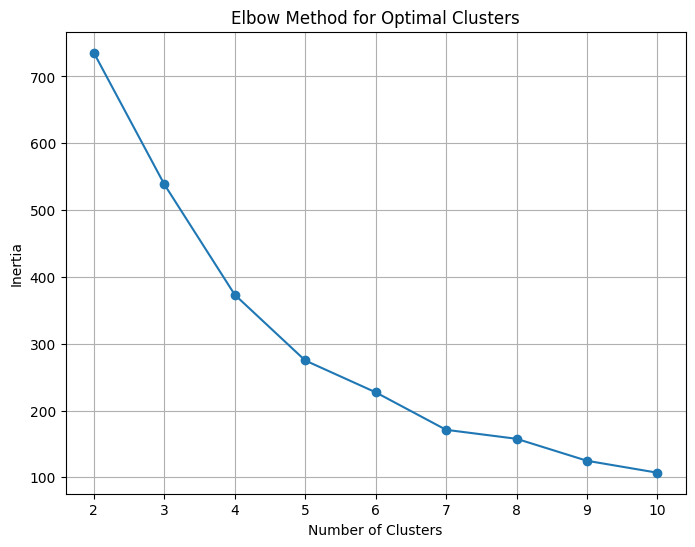

In [32]:
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [33]:
optimal_k = 4  # Choose based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
features['Cluster'] = clusters

In [34]:
db_index = davies_bouldin_score(scaled_features, clusters)
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Index: {silhouette_avg}')

Davies-Bouldin Index: 0.9475622901515466
Silhouette Index: 0.431866885211329


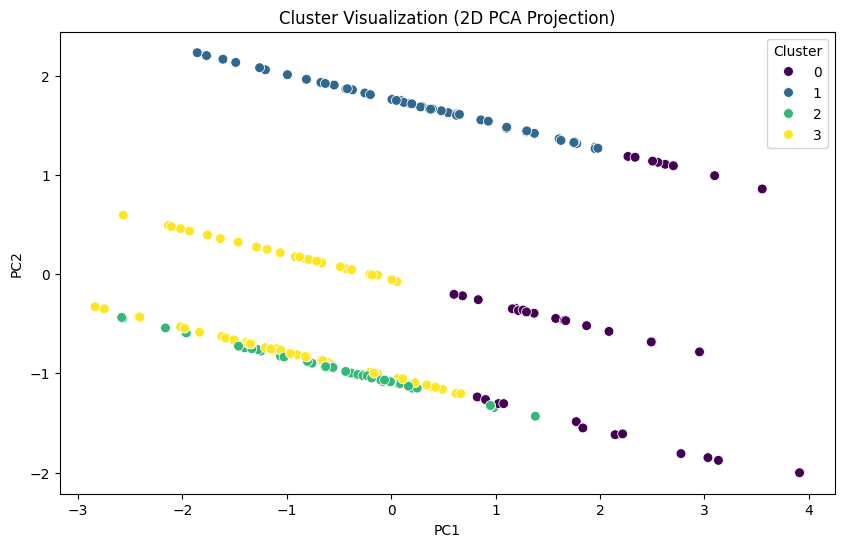

In [35]:
# 2D projection through PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
reduced_df = pd.DataFrame(reduced_features, columns=['PC1', 'PC2'])
reduced_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=reduced_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=50)
plt.title('Cluster Visualization (2D PCA Projection)')
plt.show()

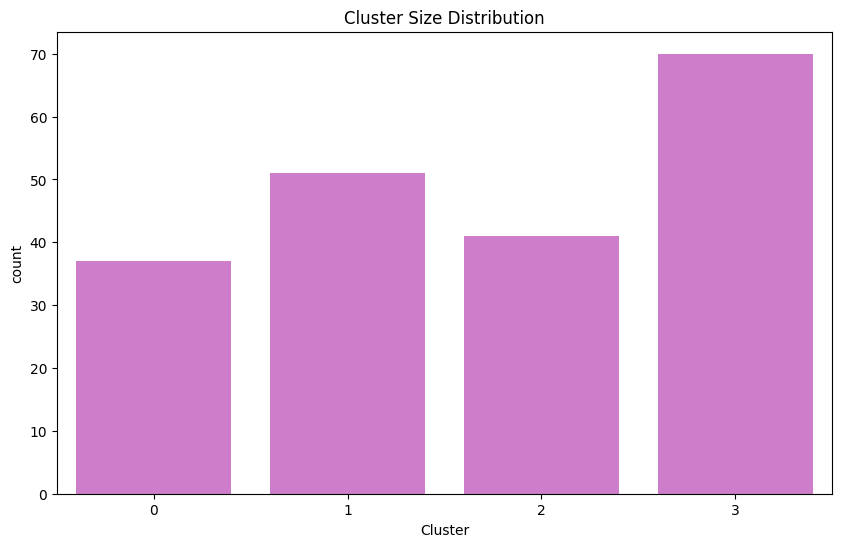

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=features, color='orchid')
plt.title('Cluster Size Distribution')
plt.show()

In [37]:
report = f"""
=== Customer Segmentation Analysis ===

Clustering Summary:
-------------------
- Total Clusters Formed: {optimal_k}
- Davies-Bouldin Index: {db_index:.4f} (Lower is better)
- Silhouette Score: {silhouette_avg:.4f} (Closer to 1 is better)

Cluster Breakdown:
------------------
Cluster 0: {sum(features['Cluster'] == 0)} customers
Cluster 1: {sum(features['Cluster'] == 1)} customers
Cluster 2: {sum(features['Cluster'] == 2)} customers
Cluster 3: {sum(features['Cluster'] == 3)} customers

Key Observations:
-----------------
- Clusters are derived from spending and regional data.
- The Elbow Method was used to determine the optimal number of clusters.
- Visualizations illustrate clear cluster separations and sizes.

"""
print(report)


=== Customer Segmentation Analysis ===

Clustering Summary:
-------------------
- Total Clusters Formed: 4
- Davies-Bouldin Index: 0.9476 (Lower is better)
- Silhouette Score: 0.4319 (Closer to 1 is better)

Cluster Breakdown:
------------------
Cluster 0: 37 customers
Cluster 1: 51 customers
Cluster 2: 41 customers
Cluster 3: 70 customers

Key Observations:
-----------------
- Clusters are derived from spending and regional data.
- The Elbow Method was used to determine the optimal number of clusters.
- Visualizations illustrate clear cluster separations and sizes.


